# Predicting Baseball Player's Salaries Using Regression Trees
## Load the dataset `Hitters`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
import pydot
from IPython.display import Image

In [52]:
import pkg_resources
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report

#### This function creates images of tree models using pydot

In [4]:
def print_tree(estimator, features, class_names=None, filled=True):
    tree=estimator
    names=features
    color=filled
    classn=class_names
    
    dot_data=StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph=pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

#### Load the Hitters data

We use Hitters data set to predict a baseball player's Salary based on Years and Hits.

In [5]:
df=pd.read_csv('./Hitters.csv').dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


We first remove the missing salary observations and log-transform the Salary

In [7]:
#Selection the features Years and Hits
X=df[['Years', 'Hits']].values

In [8]:
# log-transform the salary
y=np.log(df.Salary.values)

We do log-transform the Salary so that its distribution has more of a typical bell-shape. See the following graphs

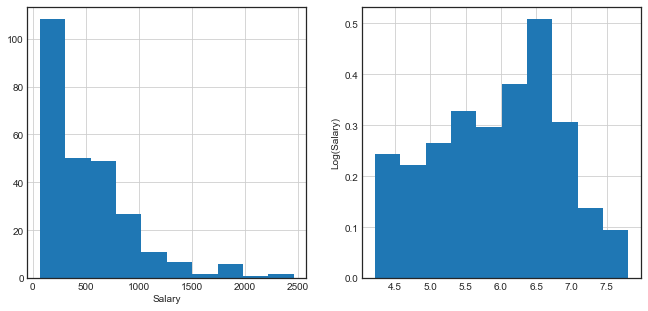

In [49]:
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(11,5))
ax1.grid(True)
ax1.hist(df.Salary.values)
ax1.set_xlabel('Salary')

ax2.hist(y, density=True)
ax2.set_ylabel('Log(Salary)')
ax2.grid(True)

### Fit a Regression Tree Model

In [10]:
regr=DecisionTreeRegressor(max_leaf_nodes=3)
regr.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=3, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Plot the Regression Tree

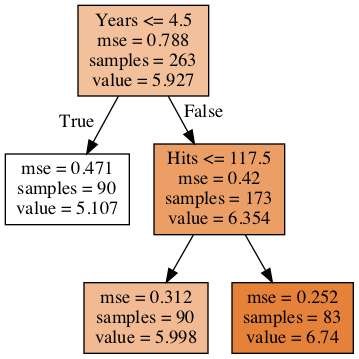

In [11]:
#Why add a period , here
graph, =print_tree(regr, features=['Years', 'Hits'])
Image(graph.create_png())

The tree-region partition for the Hitters data set from the regression tree illustrated in the figure below

Text(12, 175, 'R3')

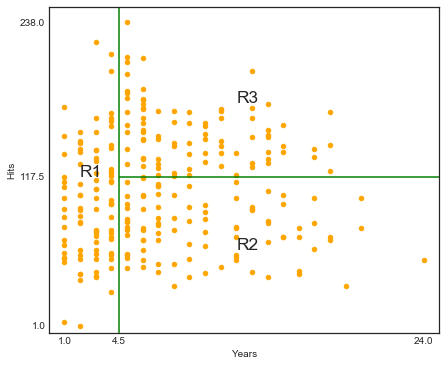

In [12]:
df.plot('Years','Hits', kind='scatter', color='orange', figsize=(7,6))
plt.xlim(0,25)
plt.ylim(bottom=-5)

##Plot the partition 
plt.xticks([1,4.5,24])
plt.yticks([1,117.5,238])

plt.vlines(4.5, ymin=-5, ymax=250, color='green')
plt.hlines(117.5, xmin=4.5, xmax=25, color='green')

## Lable the names for each region
plt.annotate('R1', xy=(2, 117.5), fontsize='xx-large')
plt.annotate('R2',xy=(12,60), fontsize='xx-large')
plt.annotate('R3', xy=(12,175), fontsize='xx-large')

### Figure 8.4 
Regression tree analysisi for the Hitters data. The unpruned tree that results from top-down splitting on the training data is shown.

In [13]:
df.head(2)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A


In [24]:
df=pd.get_dummies(df)
df.head(2)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,...,632,43,10,475.0,0,1,0,1,0,1
2,479,130,18,66,72,76,3,1624,457,63,...,880,82,14,480.0,1,0,0,1,1,0


In [25]:
df.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'Salary', 'League_A', 'League_N', 'Division_E', 'Division_W',
       'NewLeague_A', 'NewLeague_N'],
      dtype='object')

In [28]:
cols=['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'League_A', 'League_N', 'Division_E', 'Division_W',
       'NewLeague_A', 'NewLeague_N']

In [29]:
X=df.drop('Salary',axis=1)
X=X.values

In [30]:
reg_tree=DecisionTreeRegressor(max_leaf_nodes=12)
reg_tree.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=12, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

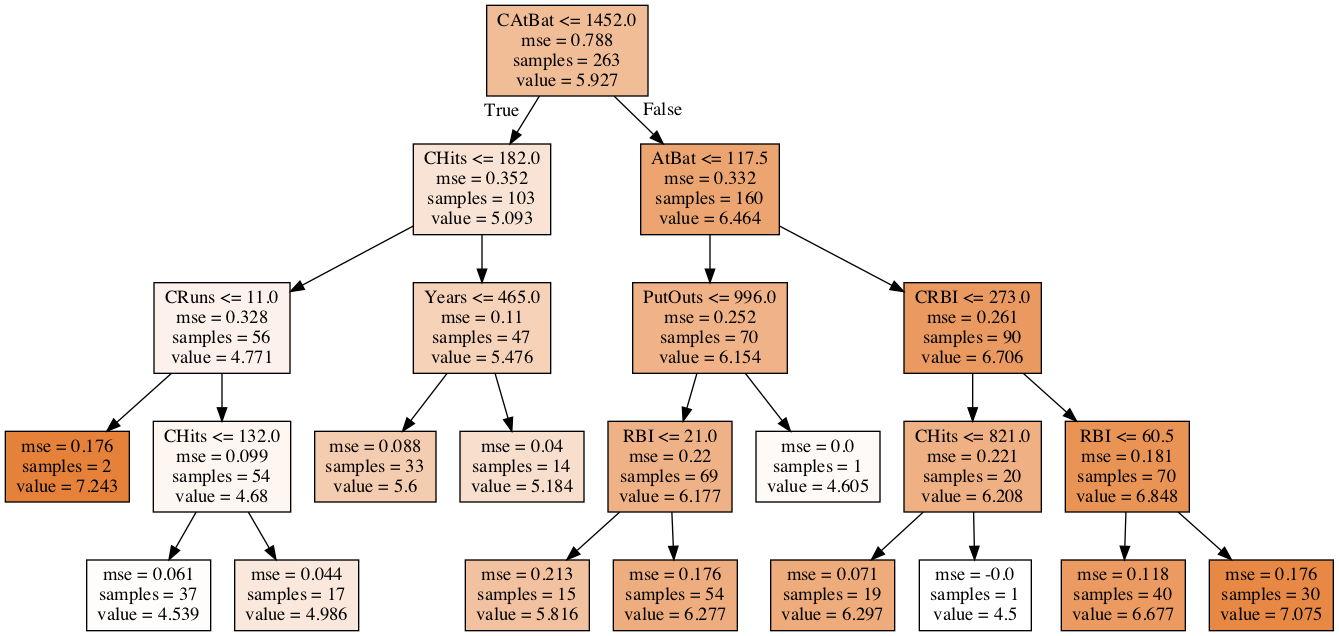

In [31]:
graph2,=print_tree(reg_tree, features=cols)
Image(graph2.create_png())

## Estimating the best terminal nodes regression tree using Cross-Validation

In [41]:
tree_size=np.arange(2,30)

MSE_scores=[]

#6-Fold CV for each tree size
for size in tree_size:
    reg_tr=DecisionTreeRegressor(max_leaf_nodes=size, random_state=123)
    MSE_s=-cross_val_score(reg_tr, X, y, cv=6, scoring='neg_mean_squared_error')
    MSE_scores.append(np.mean(MSE_s))

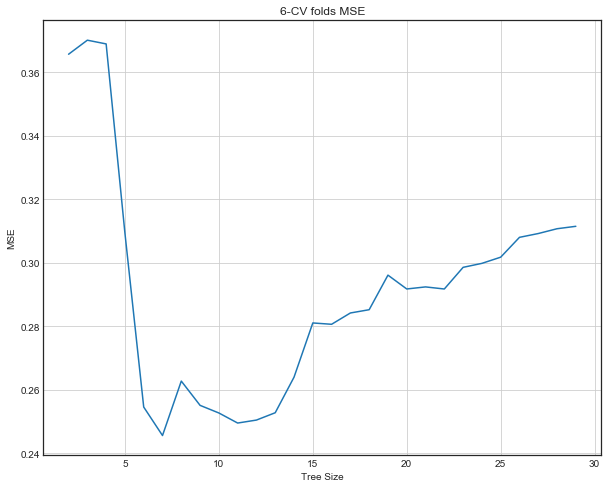

In [46]:
#plot CV-MSE as tree size gets bigger
plt.figure(figsize=(10,8))
plt.plot(tree_size, MSE_scores)
plt.title('6-CV folds MSE')
plt.xlabel('Tree Size')
plt.ylabel('MSE')
plt.grid(True)

#### Tree with 6 nodes seems to be the best.

In [50]:
best_tree=DecisionTreeRegressor(max_leaf_nodes=6)
best_tree.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=6, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

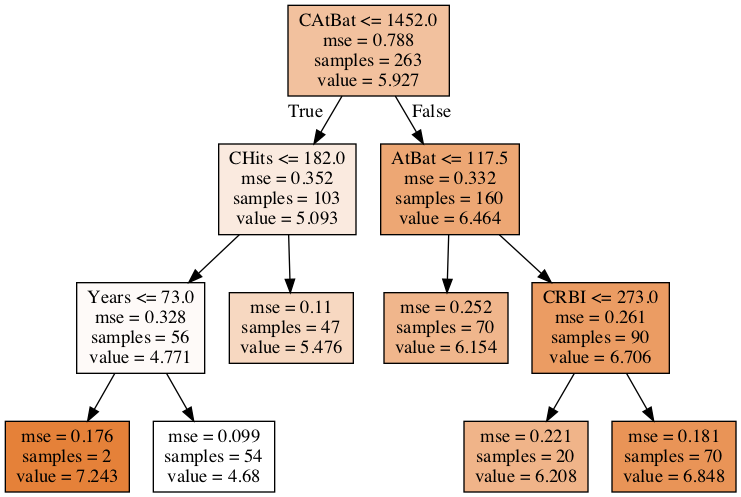

In [51]:
graph3,=print_tree(best_tree, features=cols)
Image(graph3.create_png())

# Lab 8.3.2 Fitting Regression Trees